# Appendix B: Comparison of Noise Level with Zhao+2022 Results


In [1]:
import sys, os
import datetime
import numpy as np
sys.path.append(os.path.realpath(''))
import pandas as pd
import astropy.units as u
import matplotlib.pyplot as plt
import pyspedas
from pyspedas import time_string, time_double
from pytplot import tplot, get_data, cdf_to_tplot, store_data
import tools.utilities as utils
import tools.sigma as sigma

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from scipy.signal import tukey
import matplotlib.pyplot as plt

# DIRECTORIES
RES_DIR = os.path.realpath('results')
FIG_DIR = os.path.realpath('figures')
EPS_DIR = os.path.realpath('eps_figures')
PlotDir = '/Users/tamarervin/mplstyle/'

# PLOT STYLING
plot_style = os.path.join(PlotDir, 'figure_series.mplstyle')
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.cal'] = 'Helvetica Neue LT Pro'
plt.rcParams.update({'font.size': 20})
plt.style.use(plot_style)
plt.rcParams['axes.linewidth'] = 3

enc='E15'


# First Sub-Alfvenic Interval

Parker Encounter 10
Range: '2021-11-21/19:17', '2021-11-22/02:56'

In [2]:
time_range_use = ['2021-11-21/21:17', '2021-11-22/00:56']
time_range = ['2021-11-21/19:17', '2021-11-22/02:56']
time_range = ['2021-11-21/15:00', '2021-11-22/18:56']

enc = 'E10'
edens = 'ENC10_QTN_Electron_Density.csv'

In [3]:
dt = pd.read_csv((os.path.join('/Users/tamarervin/psp-ssw/', 'electrons', edens)))
date_obj = [datetime.datetime.strptime(d, '%Y-%m-%d/%H:%M:%S') for d in dt.Time]

rd = {'Time': date_obj, 'Ne': dt.N_QTN}
dfe = pd.DataFrame(data=rd, index=None)
dfe

,Time,Ne
0,2021-11-16 04:15:01,54.9093
1,2021-11-16 04:15:04,54.1557
2,2021-11-16 04:15:08,80.8974
3,2021-11-16 04:15:11,83.2941
4,2021-11-16 04:15:15,81.8341
...,...,...
252098,2021-11-26 12:33:17,188.0350
252099,2021-11-26 12:33:21,178.3860
252100,2021-11-26 12:33:24,178.3700
252101,2021-11-26 12:33:28,173.2920


In [4]:
# FIELDS
fields_vars = pyspedas.psp.fields(trange=time_range, time_clip=True, datatype='mag_RTN_4_Sa_per_Cyc')
# SPAN-Ion - Proton Moments
pvars = pyspedas.psp.spi(trange=time_range, datatype='sf00_l3_mom', level='l3', time_clip=True)


19-Dec-23 16:55:44: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2021/
19-Dec-23 16:55:45: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2021/psp_fld_l2_mag_rtn_4_sa_per_cyc_20211121_v02.cdf
19-Dec-23 16:55:45: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2021/psp_fld_l2_mag_rtn_4_sa_per_cyc_20211122_v02.cdf
19-Dec-23 16:55:49: Time clip was applied to: psp_fld_l2_mag_RTN_4_Sa_per_Cyc
19-Dec-23 16:55:49: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2021/
19-Dec-23 16:55:49: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2021/psp_fld_l2_mag_rtn_4_sa_per_cyc_20211121_v02.cdf
19-Dec-23 16:55:50: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2021/psp_fld_l2_mag_rtn_4_sa_per_cyc_20211122_v02.cdf
19-Dec-23 16:55:50: Time clip was applied to: psp_fld_l2_quality_flags
19-Dec-23 16:55:50: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/s

Using LEVEL=L3


19-Dec-23 16:55:50: File is current: psp_data/sweap/spi/l3/spi_sf00_l3_mom/2021/psp_swp_spi_sf00_l3_mom_20211121_v04.cdf
19-Dec-23 16:55:50: File is current: psp_data/sweap/spi/l3/spi_sf00_l3_mom/2021/psp_swp_spi_sf00_l3_mom_20211122_v04.cdf
19-Dec-23 16:55:53: Time clip was applied to: psp_spi_QUALITY_FLAG
19-Dec-23 16:55:53: Time clip was applied to: psp_spi_DENS
19-Dec-23 16:55:53: Time clip was applied to: psp_spi_VEL_INST
19-Dec-23 16:55:53: Time clip was applied to: psp_spi_VEL_SC
19-Dec-23 16:55:54: Time clip was applied to: psp_spi_VEL_RTN_SUN
19-Dec-23 16:55:54: Time clip was applied to: psp_spi_T_TENSOR_INST
19-Dec-23 16:55:54: Time clip was applied to: psp_spi_TEMP
19-Dec-23 16:55:54: Time clip was applied to: psp_spi_EFLUX_VS_ENERGY
19-Dec-23 16:55:55: Time clip was applied to: psp_spi_EFLUX_VS_THETA
19-Dec-23 16:55:55: Time clip was applied to: psp_spi_EFLUX_VS_PHI
19-Dec-23 16:55:55: Time clip was applied to: psp_spi_SUN_DIST
19-Dec-23 16:55:56: Time clip was applied to: 

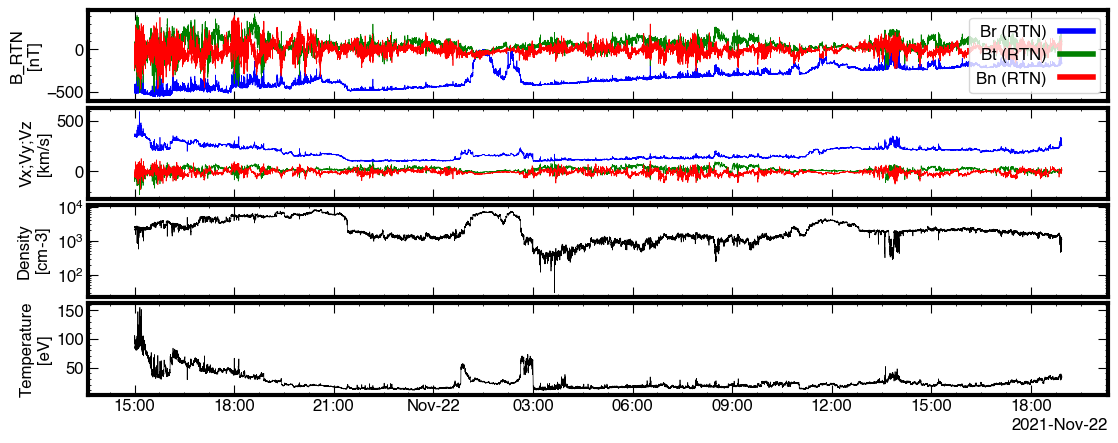

In [5]:
tplot(['psp_fld_l2_mag_RTN_4_Sa_per_Cyc', 'psp_spi_VEL_RTN_SUN', 'psp_spi_DENS', 'psp_spi_TEMP'])

In [6]:
dt = get_data('psp_spi_VEL_RTN_SUN')
dt2 = get_data('psp_spi_DENS')
dt3 = get_data('psp_spi_TEMP')
date_obj = [datetime.datetime.strptime(time_string(d), '%Y-%m-%d %H:%M:%S.%f') for d in dt.times]
rd = {'Time': date_obj, 'vr': dt.y[:, 0], 'vt': dt.y[:, 1], 'vn': dt.y[:, 2], 'Np': dt2.y, 'Tp': dt3.y, 'use_dens': dt2.y}
dfp = pd.DataFrame(data=rd)

dtb = get_data('psp_fld_l2_mag_RTN_4_Sa_per_Cyc')
date_obj_mag = [datetime.datetime.strptime(time_string(d), '%Y-%m-%d %H:%M:%S.%f') for d in dtb.times]
rd = {'Time': date_obj_mag, 'Br': dtb.y[:, 0], 'Bt': dtb.y[:, 1], 'Bn': dtb.y[:, 2]}
dfb = pd.DataFrame(data=rd)

df = pd.merge_asof(dfp, dfb, on='Time', direction='backward')
df = pd.merge_asof(df, dfe, on='Time', direction='backward')
df['use_dens'] = df.Ne
# use = np.logical_and(np.array(date_obj)>=datetime.datetime.strptime(time_range_use[0], '%Y-%m-%d/%H:%M'), np.array(date_obj)<=datetime.datetime.strptime(time_range_use[1], '%Y-%m-%d/%H:%M'))
# df = df[use].copy()
df

,Time,vr,vt,vn,Np,Tp,use_dens,Br,Bt,Bn,Ne
0,2021-11-21 15:00:00.722655,357.012634,-58.556137,17.235584,2511.928955,96.719322,2101.91,-496.039093,-89.329460,46.684128,2101.91
1,2021-11-21 15:00:02.470336,355.774780,-58.868053,-10.277226,2595.755859,100.552681,2251.97,-493.942932,-83.066010,-24.598534,2251.97
2,2021-11-21 15:00:04.217956,351.675537,-44.953976,0.249818,2407.114502,95.565376,2251.97,-503.286499,-63.912880,-1.397635,2251.97
3,2021-11-21 15:00:05.965576,350.189819,-35.494179,0.134341,2455.108154,94.349060,2278.73,-498.780914,-26.180296,30.887085,2278.73
4,2021-11-21 15:00:07.713197,361.284760,-74.673592,-19.291044,2638.946289,103.246704,2278.73,-478.333557,-125.009781,-8.607118,2278.73
...,...,...,...,...,...,...,...,...,...,...,...
30283,2021-11-22 18:55:44.566617,261.148834,10.111103,18.064177,1106.759888,34.271328,1068.62,-153.145096,99.168900,73.920593,1068.62
30284,2021-11-22 18:55:48.061857,259.725281,13.113806,8.394384,1080.683716,35.711655,1194.95,-158.326370,105.010834,56.783283,1194.95
30285,2021-11-22 18:55:51.557158,258.715668,11.332609,16.680042,1110.147949,33.160198,1058.65,-160.396652,95.727875,65.618233,1058.65
30286,2021-11-22 18:55:55.052398,255.306168,10.867666,18.860325,1112.378906,33.375118,1053.05,-167.331604,84.867142,65.168602,1053.05


In [7]:
sigmas = sigma.calc_sigma(df, num=8) # sigmac, sigmar, vA, Zp, Zm, deltav, deltab
df['sigmac'],df['sigmar'], df['vA'], df['Zp'],df['Zm'], df['deltav'], df['deltab'] = sigmas
# fig, axs = plt.subplots(len(sigmas), figsize=[20, 12], sharex='all')
lab = ['sigmac', 'sigmar', 'vA', 'Zp', 'Zm', 'deltav', 'deltab']
# for i, ax in enumerate(axs):
#     ax.scatter(df.Time, sigmas[i], c=sigmas[i], cmap='RdPu', s=3)
#     ax.set(ylabel=lab[i])
#     print('Mean value of', lab[i], 'over the interval is:', np.nanmean(sigmas[i]))

In [8]:
### RESAMPLE 
df = df.set_index(df.Time)
bin_size = pd.Timedelta(seconds=5)
turb = df.resample(bin_size, closed='left', label='left', loffset=bin_size / 2).ffill()
turb['Time'] = turb.index
turb = turb.dropna()
turb
### RESAMPLE 
ss, ii = 1300, 2
tZp = [turb.Zp[i*ss:i*ss+ss] for i in range(0, ii)]
tZm = [turb.Zm[i*ss:i*ss+ss] for i in range(0, ii)]
tdv = [turb.deltav[i*ss:i*ss+ss] for i in range(0, ii)]
tdb = [turb.deltab[i*ss:i*ss+ss] for i in range(0, ii)]

19-Dec-23 16:56:18: /var/folders/by/lx780c7j7w58m_tkpc3q83kc0000gn/T/ipykernel_7538/3480943839.py:4: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  turb = df.resample(bin_size, closed='left', label='left', loffset=bin_size / 2).ffill()



## Test Pressure Anisotropy

In [9]:
# import numpy as np

# # Define the RTN magnetic field fluctuations (replace with your data)
# B_R = df.Br
# B_T = df.Bt
# B_N = df.Bn

# # Stack magnetic field components into a matrix
# magnetic_field_RTN = np.column_stack([B_R, B_T, B_N])

# # Calculate time-averaged components
# mean_B_R = np.mean(B_R)
# mean_B_T = np.mean(B_T)
# mean_B_N = np.mean(B_N)

# # Construct mean magnetic field vector
# mean_magnetic_field_direction_RTN = np.array([mean_B_R, mean_B_T, mean_B_N])

# # Normalize the vector to obtain the mean direction
# mean_magnetic_field_direction_RTN /= np.linalg.norm(mean_magnetic_field_direction_RTN)

# # Compute the rotation matrix to align with the mean magnetic field direction
# rotation_matrix = np.linalg.qr(np.column_stack([mean_magnetic_field_direction_RTN, np.cross([1, 0, 0], mean_magnetic_field_direction_RTN), [0, 0, 1]]))[0]

# # Apply the rotation to magnetic field fluctuations
# magnetic_field_XYZ = np.dot(magnetic_field_RTN, rotation_matrix)

# # Extract the transformed components
# B_X = magnetic_field_XYZ[:, 0]
# B_Y = magnetic_field_XYZ[:, 1]
# B_Z = magnetic_field_XYZ[:, 2]

# # Display the mean magnetic field direction
# print("Mean Magnetic Field Direction (RTN):", mean_magnetic_field_direction_RTN)

# # Display the transformed components
# print("Transformed Components (XYZ):")
# print("B_X:", B_X)
# print("B_Y:", B_Y)
# print("B_Z:", B_Z)




In [10]:
# import numpy as np
# import pandas as pd
# from tools.sigma import smooth, calculate_delta

# # Function to apply transformation to each 6-hour window
# def transform_in_window(window_data):
#     # Calculate mean magnetic field direction for the window
#     mean_B_R = window_data['Br'].mean()
#     mean_B_T = window_data['Bt'].mean()
#     mean_B_N = window_data['Bn'].mean()
#     mean_magnetic_field_direction_RTN = np.array([mean_B_R, mean_B_T, mean_B_N])
#     mean_magnetic_field_direction_RTN /= np.linalg.norm(mean_magnetic_field_direction_RTN)

#     bhat = mean_magnetic_field_direction_RTN

#     ### align new coordinate system along direction of mean magnetic field
#     # z-direction : bhat
#     zhat = bhat
#     # y-direction : - zhat cross rhat
#     yhat = - np.cross(zhat, [1, 0, 0]) / np.linalg.norm(np.cross(zhat, [1, 0, 0]))
#     # x-direction : bhat cross xhat
#     xhat = np.cross(yhat, zhat)
   

#     ### rotation matrix
#     rotation_matrix = np.linalg.qr(np.column_stack([
#         xhat, yhat, zhat
#     ]))[0]


#     # Apply the rotation to magnetic field fluctuations
#     magnetic_field_XYZ = np.dot(window_data[['Br', 'Bt', 'Bn']].values, rotation_matrix)

#     # Extract the transformed components
#     window_data['B_X'] = magnetic_field_XYZ[:, 0]
#     window_data['B_Y'] = magnetic_field_XYZ[:, 1]
#     window_data['B_Z'] = magnetic_field_XYZ[:, 2]

#     return window_data

# # Iterate over non-overlapping 6-hour windows and apply the transformation
# for _, window_data in df.groupby(pd.Grouper(freq='1H')):
#     # Apply transformation in the current window
#     window_data_transformed = transform_in_window(window_data)

#     # Smooth and calculate magnetic field fluctuations
#     num=8
#     B_X_smo = smooth(window_data_transformed['B_X'], num)
#     B_Y_smo = smooth(window_data_transformed['B_Y'], num)
#     B_Z_smo = smooth(window_data_transformed['B_Z'], num)
#     delta_B_X = calculate_delta(window_data_transformed['B_X'], B_X_smo)
#     delta_B_Y = calculate_delta(window_data_transformed['B_Y'], B_Y_smo)
#     delta_B_Z = calculate_delta(window_data_transformed['B_Z'], B_Z_smo)

#     # Calculate Fourier transform of magnetic field components
#     B_X_fft = np.fft.fftn(delta_B_X)
#     B_Y_fft = np.fft.fftn(delta_B_Y)
#     B_Z_fft = np.fft.fftn(delta_B_Z)

#     # Compute Power Spectra
#     window_data_transformed['PSD_X'] = np.abs(B_X_fft)**2
#     window_data_transformed['PSD_Y'] = np.abs(B_Y_fft)**2
#     window_data_transformed['PSD_Z'] = np.abs(B_Z_fft)**2

#     # Calculate 1D Reduced Spectrum
#     Pxx = np.real(B_X_fft * np.conj(B_X_fft))
#     Pyy = np.real(B_Y_fft * np.conj(B_Y_fft))
#     Pzz = np.real(B_Z_fft * np.conj(B_Z_fft))

#     # Transverse component
#     window_data_transformed['P_perp'] = window_data_transformed['PSD_X'] + window_data_transformed['PSD_X']

#     # Longitudinal component
#     window_data_transformed['P_parallel'] = window_data_transformed['PSD_Z']

#     # Anisotropy
#     window_data_transformed['P_ani'] = window_data_transformed['P_perp'] / window_data_transformed['P_parallel']

#     # Append the results to the final DataFrame
#     df = pd.concat([df, window_data_transformed])

# df

# sigma_bin = pd.Timedelta(minutes=10)
# pss = df.resample(sigma_bin, closed='left', label='left', loffset=sigma_bin / 2).mean()
# pss['Time'] = pss.index
# # plt.plot(pss.Time, pss.P_parallel, color='red')
# # plt.plot(pss.Time, pss.P_perp, color='k')

# fig, ax = plt.subplots(1, figsize=[12, 6])
# ax.plot(pss.Time, pss.P_ani, color='b')
# ax.set_ylim(1e-2, 1e3)
# ax.set_yscale('log')
# ax.axhline(9, color='red')

In [11]:
# import numpy as np
# import pandas as pd
# from tools.sigma import smooth, calculate_delta

# # Define window size and frequency (1 hour)
# window_size = '1H'
# frequency = '1m'

# # Iterate over overlapping 1-hour windows and apply the transformation
# start_time = df['Time'].min()
# end_time = df['Time'].max()

# while start_time <= end_time:
#     # Extract data for the current window
#     window_data = df[(df['Time'] >= start_time) & (df['Time'] < start_time + pd.Timedelta(window_size))]

#     # Check if there is data in the current window
#     if not window_data.empty:
#         # Apply transformation in the current window
#         window_data_transformed = transform_in_window(window_data)

#         # Smooth and calculate magnetic field fluctuations
#         num=8
#         B_X_smo = smooth(window_data_transformed['B_X'], num)
#         B_Y_smo = smooth(window_data_transformed['B_Y'], num)
#         B_Z_smo = smooth(window_data_transformed['B_Z'], num)
#         delta_B_X = calculate_delta(window_data_transformed['B_X'], B_X_smo)
#         delta_B_Y = calculate_delta(window_data_transformed['B_Y'], B_Y_smo)
#         delta_B_Z = calculate_delta(window_data_transformed['B_Z'], B_Z_smo)

#         # Calculate Fourier transform of magnetic field components
#         B_X_fft = np.fft.fftn(delta_B_X)
#         B_Y_fft = np.fft.fftn(delta_B_Y)
#         B_Z_fft = np.fft.fftn(delta_B_Z)

#         # Compute Power Spectra
#         window_data_transformed['PSD_X'] = np.abs(B_X_fft)**2
#         window_data_transformed['PSD_Y'] = np.abs(B_Y_fft)**2
#         window_data_transformed['PSD_Z'] = np.abs(B_Z_fft)**2

#         # Calculate 1D Reduced Spectrum
#         Pxx = np.real(B_X_fft * np.conj(B_X_fft))
#         Pyy = np.real(B_Y_fft * np.conj(B_Y_fft))
#         Pzz = np.real(B_Z_fft * np.conj(B_Z_fft))

#         # Transverse component
#         window_data_transformed['P_perp'] = window_data_transformed['PSD_X'] + window_data_transformed['PSD_X']

#         # Longitudinal component
#         window_data_transformed['P_parallel'] = window_data_transformed['PSD_Z']

#         # Anisotropy
#         window_data_transformed['P_ani'] = window_data_transformed['P_perp'] / window_data_transformed['P_parallel']

#         # Append the results to the final DataFrame
#         df = pd.concat([df, window_data_transformed])

#     # Move to the next overlapping window
#     start_time += pd.Timedelta(frequency)

# sigma_bin = pd.Timedelta(minutes=10)
# pss = df.resample(sigma_bin, closed='left', label='left', loffset=sigma_bin / 2).mean()
# pss['Time'] = pss.index

# fig, ax = plt.subplots(1, figsize=[12, 6])
# ax.plot(pss.Time, pss.P_ani, color='b')
# ax.set_ylim(1e-2, 1e3)
# ax.set_yscale('log')
# ax.axhline(9, color='red')

In [12]:
# fig, ax = plt.subplots(1, figsize=[12, 6])
# # ax.plot(pss.Time, pss.PSD_X, color='k')
# # ax.plot(pss.Time, pss.PSD_Y, color='r')
# # ax.plot(pss.Time, pss.PSD_Z, color='b')
# ax.plot(pss.Time, pss.P_ani, color='green')
# # ax.set_ylim(1e-2, 1e3)
# ax.set_yscale('log')
# # ax.axhline(9, color='red')

In [13]:
# ### COORDINATE TRANSFORMATION
# data = df
# # bhat = Bvec / |B|
# mean_B_R = data['Br'].mean()
# mean_B_T = data['Bt'].mean()
# mean_B_N = data['Bn'].mean()
# mean_magnetic_field_direction_RTN = np.array([mean_B_R, mean_B_T, mean_B_N])
# mean_magnetic_field_direction_RTN /= np.linalg.norm(mean_magnetic_field_direction_RTN)
# bhat = mean_magnetic_field_direction_RTN

# ### align new coordinate system along direction of mean magnetic field
# # x-direction : bhat cross rhat
# xhat = np.cross([1, 0, 0], bhat)
# # y-direction : bhat cross xhat
# yhat = np.cross(bhat, xhat)
# # z-direction : bhat
# zhat = bhat

# ### rotation matrix
# rotation_matrix = np.linalg.qr(np.column_stack([
#     xhat, yhat, zhat
# ]))[0]

# ### rotate the rtn coordinates by the rotation matrix
# magnetic_field_XYZ = np.dot(window_data[['Br', 'Bt', 'Bn']].values, rotation_matrix)

# # Extract the transformed components
# window_data['B_X'] = magnetic_field_XYZ[:, 0]
# window_data['B_Y'] = magnetic_field_XYZ[:, 1]
# window_data['B_Z'] = magnetic_field_XYZ[:, 2]


## Create PSD

In [14]:
def windowed_psd(series):
    dff, dfp = pd.DataFrame(), pd.DataFrame()
    plt.figure()
    col=['red', 'green', 'blue', 'orange']
    for i, time_series in enumerate(series):
        ### RESAMPLE DATA
        sample_rate = 1/5  # sample rate in seconds
        sample_freq = 1/sample_rate # sample frequency in Hz
        N = len(time_series)

        ### Create a Tukey window
        alpha = 0.5 
        tukey_window = tukey(N, alpha)
        windowed_time_series = time_series * tukey_window
        
        # Compute the FFT of the windowed time series
        fft_result = np.fft.fft(windowed_time_series) / N ## calculate FFT and normalize
        fft_freq = np.fft.fftfreq(len(fft_result), sample_freq)
        # fft_freq = fft_freq[:len(fft_freq) // 2]
        
        # Calculate the power spectral density
        power_spectrum = (2*N/sample_freq) * np.abs(fft_result)**2

        # normalize by the tukey window
        ww = 1/2 * (1 - np.cos((2 * np.pi * np.arange(0, N * alpha / 2)) / (alpha * N)))
        ww1 = 1/2 * (1 - np.cos((2 * np.pi * np.arange(N / 2 + N * alpha / 2, N)) / (alpha * N)))

        # Create the piecewise function
        y1 = ww
        x2 = np.arange(N * alpha / 2, N / 2 + N * alpha / 2)
        y2 = np.ones(len(x2))
        y3 = ww1

        ### CALCULATE Wss
        Wss = np.sum(np.concatenate((y1, y2, y3)) ** 2) / N
        power_spectrum /= Wss

        # Add to average
        dff[str(i)] = np.abs(fft_freq)
        dfp[str(i)] = power_spectrum
        
        plt.loglog(dff[str(i)], dfp[str(i)] , color=col[i])

    dfp['freq'] = dff.mean(axis=1)
    dfp['power'] = dfp.mean(axis=1)

    return dfp


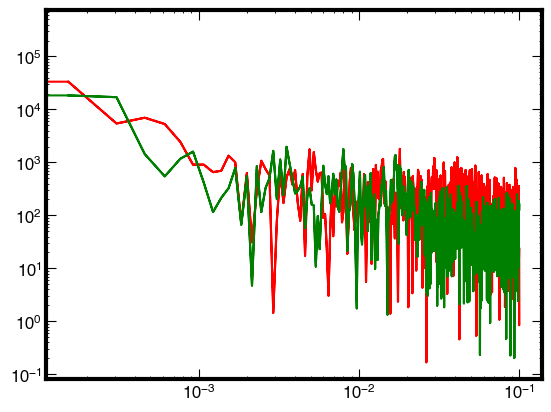

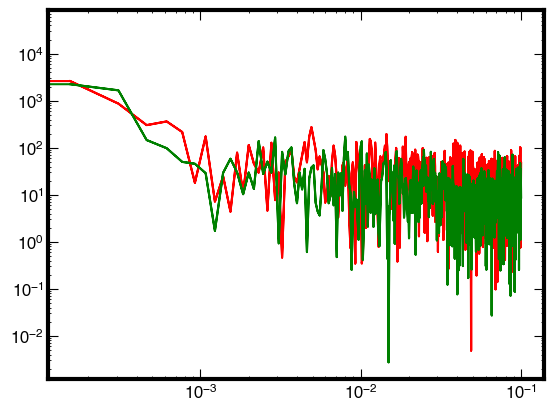

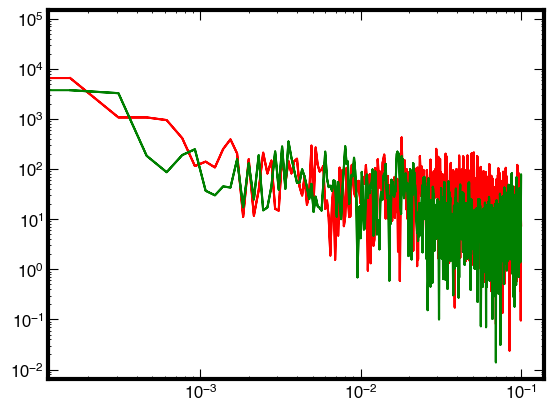

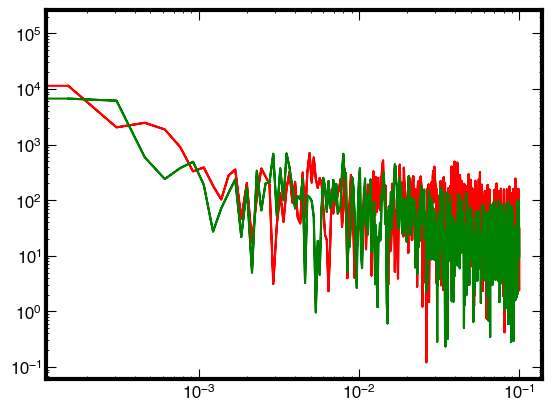

In [15]:
### Z plus
psd_Zp = windowed_psd(tZp)

### Z minus
psd_Zm = windowed_psd(tZm)

### Delta v
psd_dv = windowed_psd(tdv)

### Delta b
psd_db = windowed_psd(tdb)


## Noise Comparison

In [16]:
### ----- calculate spectra for noise ------ ###
N = len(psd_Zp.freq)  # Number of samples
refspec, sn = [], []
for i, vv in enumerate([1, 3, 5]):
    speed = 100
    noise_level = vv  # Amplitude of the noise in km/s
    sample_freq = 1

    # Generate a constant signal with some noise
    signal = np.ones(N) * speed
    noise = np.random.normal(0, noise_level, N)  # Generate random noise
    data_km_per_s = signal + noise

    # Compute the FFT of the windowed time series (as previously calculated)
    fft_result = np.fft.fft(data_km_per_s)

    # Compute the FFT of the windowed time series
    fft_result = np.fft.fft(data_km_per_s) / N ## calculate FFT and normalize
    fft_freq = np.fft.fftfreq(len(fft_result), sample_freq)
    fft_freq = fft_freq[:len(fft_freq) // 2]

    # Calculate the power spectral density
    ref_spec = (2*N/sample_freq) * np.abs(fft_result)**2
    
    sn.append(data_km_per_s)
    refspec.append(ref_spec)


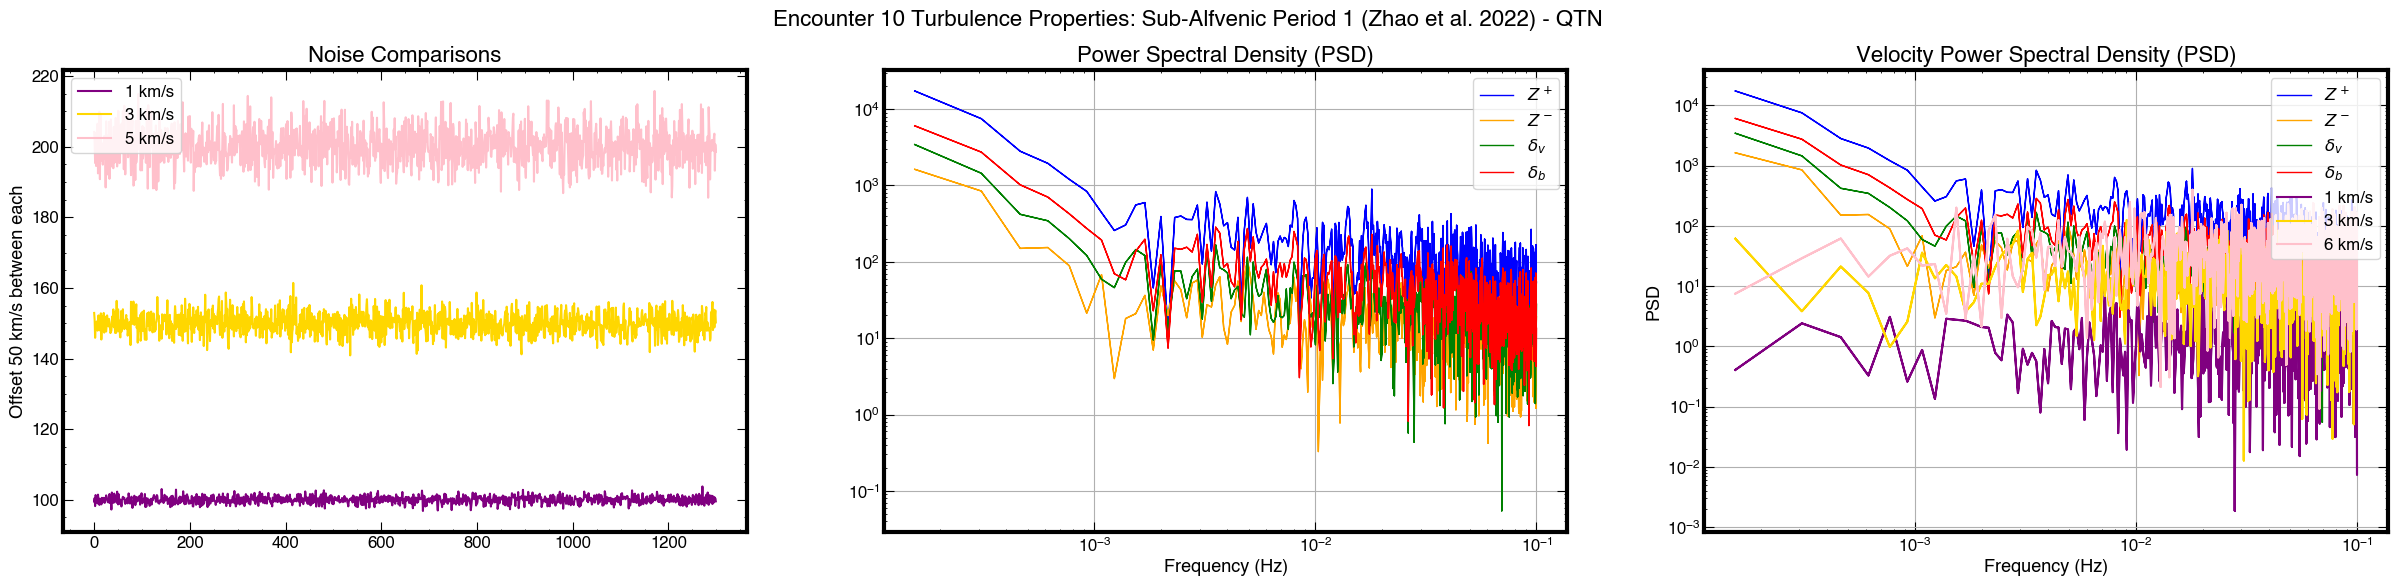

In [17]:
# Plot the PSD

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=[30, 6])
colors = ['blue', 'orange', 'green', 'red']
labels=[r'$Z^+$', r'$Z^-$', r'$\delta_v$', r'$\delta_b$']

##### NOISE COMPARISON #####
lab = ['1 km/s', '3 km/s', '5 km/s']
col = ['purple', 'gold', 'pink']
xy=[0, 50, 100]
for i, xx in enumerate(sn):
    ax1.plot(xx+xy[i], c=col[i], label=lab[i])

ax1.set_ylabel('Offset 50 km/s between each')
ax1.set_title('Noise Comparisons')
ax1.legend()

##### SPECTRA #####
freq = psd_Zp.freq
good = np.logical_and(np.array(freq)<=1, np.array(freq)>=1e-4)

for i, psd_spec in enumerate([psd_Zp, psd_Zm, psd_dv, psd_db]):
    ax2.plot(psd_spec.freq[good], psd_spec.power[good], c=colors[i], label=labels[i], linewidth=1)

ax2.legend(loc='upper right')
ax2.set_title('Power Spectral Density (PSD)')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_xscale('log')  
ax2.set_yscale('log')
ax2.grid(True)

##### NOISE + SPECTRA #####
for i, psd_spec in enumerate([psd_Zp, psd_Zm, psd_dv, psd_db]):
    ax3.plot(psd_spec.freq[good], psd_spec.power[good], c=colors[i], label=labels[i], linewidth=1)

ax3.plot(freq[good], refspec[0][good], label='1 km/s', color=col[0])
ax3.plot(freq[good], refspec[1][good], label='3 km/s', color=col[1])
ax3.plot(freq[good], refspec[2][good], label='6 km/s', color=col[2])
ax3.legend(loc='upper right')
ax3.set_title('Velocity Power Spectral Density (PSD)')
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('PSD')  
ax3.set_xscale('log')  
ax3.set_yscale('log')
ax3.grid(True)
# plt.savefig('PSD.png')

plt.suptitle('Encounter 10 Turbulence Properties: Sub-Alfvenic Period 1 (Zhao et al. 2022) - QTN')
plt.show()

## APPENDIX FIGURE

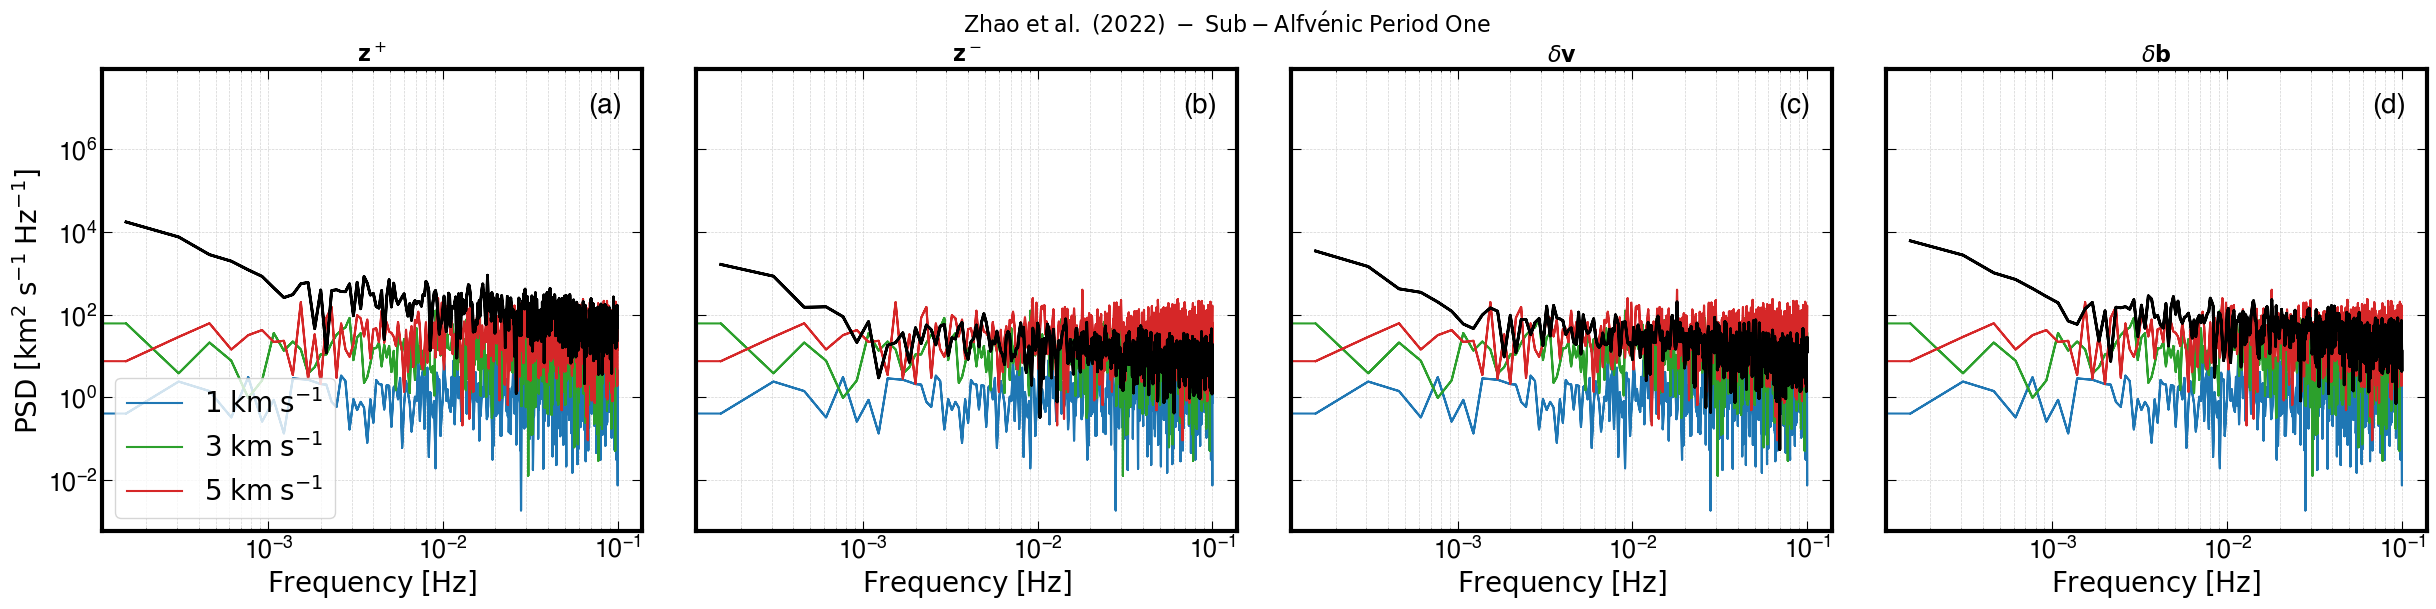

In [18]:
# Plot the PSD
lw=2
fig, axs = plt.subplots(1, 4, figsize=[30, 6], sharex='all', sharey='all', gridspec_kw={'wspace':0.1})
col = ['tab:blue', 'tab:green', 'tab:red']
panels = ['(a)', '(b)', '(c)', '(d)']
labels=[r'$\mathbf{z}^+$', r'$\mathbf{z}^-$', r'$\delta \mathbf{v}$', r'$\delta \mathbf{b}$']

##### ----- FAKE SPECTRA ---- #####
for i, ax in enumerate(axs):
    ax.plot(freq, refspec[0], label=r'$\rm 1 \; km \; s^{-1}$', color=col[0])
    ax.plot(freq, refspec[1], label=r'$\rm 3 \; km \; s^{-1}$', color=col[1])
    ax.plot(freq, refspec[2], label=r'$\rm 5 \; km \; s^{-1}$', color=col[2])
    ax.set_xlabel(r'$\rm Frequency \; [Hz]$', fontsize=20)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')
    ax.tick_params(axis='both', which='major', labelsize=18) 
    ax.text(0.90, 0.95, panels[i], transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
    ax.set_xscale('log')  
    ax.set_yscale('log')  
    ax.set_title(labels[i])

##### ------ REAL SPECTRA #####
for i, psd_spec in enumerate([psd_Zp, psd_Zm, psd_dv, psd_db]):
    axs[i].plot(psd_spec.freq[good], psd_spec.power[good], c='k', linewidth=lw, zorder=4)

### ADD PANEL LABELS
axs[0].set_ylabel(r'$\rm PSD \; [km^2 \; s^{-1} \; Hz^{-1}]$', fontsize=20)
axs[0].legend(loc='lower left', fontsize=20)

plt.suptitle(r'$\rm Zhao \; et \; al. \; (2022) \; - \; Sub-Alfv\'enic \; Period \; One$')
plt.show()

# Sub - Alfven Period Two

In [19]:
time_range_use = ['2021-11-22/02:40', '2021-11-22/09:55']
time_range = ['2021-11-22/00:40', '2021-11-22/11:55']

enc = 'E10'

19-Dec-23 16:56:28: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2021/
19-Dec-23 16:56:28: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2021/psp_fld_l2_mag_rtn_4_sa_per_cyc_20211122_v02.cdf
19-Dec-23 16:56:30: Time clip was applied to: psp_fld_l2_mag_RTN_4_Sa_per_Cyc
19-Dec-23 16:56:30: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2021/
19-Dec-23 16:56:30: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2021/psp_fld_l2_mag_rtn_4_sa_per_cyc_20211122_v02.cdf
19-Dec-23 16:56:30: Time clip was applied to: psp_fld_l2_quality_flags
19-Dec-23 16:56:30: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spi/l3/spi_sf00_l3_mom/2021/


Using LEVEL=L3


19-Dec-23 16:56:31: File is current: psp_data/sweap/spi/l3/spi_sf00_l3_mom/2021/psp_swp_spi_sf00_l3_mom_20211122_v04.cdf
19-Dec-23 16:56:32: Time clip was applied to: psp_spi_QUALITY_FLAG
19-Dec-23 16:56:32: Time clip was applied to: psp_spi_DENS
19-Dec-23 16:56:32: Time clip was applied to: psp_spi_VEL_INST
19-Dec-23 16:56:32: Time clip was applied to: psp_spi_VEL_SC
19-Dec-23 16:56:32: Time clip was applied to: psp_spi_VEL_RTN_SUN
19-Dec-23 16:56:32: Time clip was applied to: psp_spi_T_TENSOR_INST
19-Dec-23 16:56:32: Time clip was applied to: psp_spi_TEMP
19-Dec-23 16:56:32: Time clip was applied to: psp_spi_EFLUX_VS_ENERGY
19-Dec-23 16:56:32: Time clip was applied to: psp_spi_EFLUX_VS_THETA
19-Dec-23 16:56:32: Time clip was applied to: psp_spi_EFLUX_VS_PHI
19-Dec-23 16:56:32: Time clip was applied to: psp_spi_SUN_DIST
19-Dec-23 16:56:32: Time clip was applied to: psp_spi_VENUS_DIST
19-Dec-23 16:56:32: Time clip was applied to: psp_spi_SC_VEL_RTN_SUN
19-Dec-23 16:56:32: Time clip was

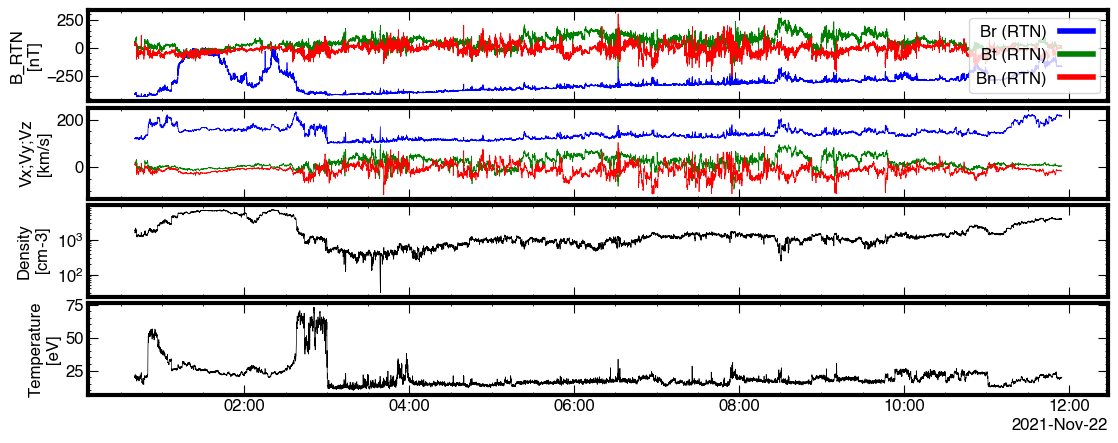

In [20]:
# FIELDS
fields_vars = pyspedas.psp.fields(trange=time_range, time_clip=True, datatype='mag_RTN_4_Sa_per_Cyc')

# SPAN-Ion - Proton Moments
pvars = pyspedas.psp.spi(trange=time_range, datatype='sf00_l3_mom', 
                            level='l3', time_clip=True)

tplot(['psp_fld_l2_mag_RTN_4_Sa_per_Cyc', 'psp_spi_VEL_RTN_SUN', 'psp_spi_DENS', 'psp_spi_TEMP'])

In [21]:
dt = get_data('psp_spi_VEL_RTN_SUN')
dt2 = get_data('psp_spi_DENS')
dt3 = get_data('psp_spi_TEMP')
date_obj = [datetime.datetime.strptime(time_string(d), '%Y-%m-%d %H:%M:%S.%f') for d in dt.times]
rd = {'Time': date_obj, 'vr': dt.y[:, 0], 'vt': dt.y[:, 1], 'vn': dt.y[:, 2], 'Np': dt2.y, 'Tp': dt3.y, 'use_dens': dt2.y}
dfp = pd.DataFrame(data=rd)

dtb = get_data('psp_fld_l2_mag_RTN_4_Sa_per_Cyc')
date_obj_mag = [datetime.datetime.strptime(time_string(d), '%Y-%m-%d %H:%M:%S.%f') for d in dtb.times]
rd = {'Time': date_obj_mag, 'Br': dtb.y[:, 0], 'Bt': dtb.y[:, 1], 'Bn': dtb.y[:, 2]}
dfb = pd.DataFrame(data=rd)

df = pd.merge_asof(dfp, dfb, on='Time', direction='backward')
df = pd.merge_asof(df, dfe, on='Time', direction='backward')
df['use_dens'] = df.Ne
use = np.logical_and(np.array(date_obj)>=datetime.datetime.strptime(time_range_use[0], '%Y-%m-%d/%H:%M'), np.array(date_obj)<=datetime.datetime.strptime(time_range_use[1], '%Y-%m-%d/%H:%M'))
df = df[use].copy()
df

,Time,vr,vt,vn,Np,Tp,use_dens,Br,Bt,Bn,Ne
2060,2021-11-22 02:40:02.376446,190.172562,-2.744009,-17.795038,1530.644409,68.782677,2109.350,-382.216583,34.573666,-29.822535,2109.350
2061,2021-11-22 02:40:05.871746,195.611771,-2.121698,-12.793027,1507.855835,67.894890,2084.370,-382.690369,37.165279,-15.674521,2084.370
2062,2021-11-22 02:40:09.366987,192.716599,-6.865456,-16.147787,1598.875488,65.865906,1334.360,-383.534271,32.708843,-13.530056,1334.360
2063,2021-11-22 02:40:12.862288,193.254059,-7.225265,-12.641088,1525.812378,67.355858,1357.330,-384.971710,28.065044,-26.803917,1357.330
2064,2021-11-22 02:40:16.357528,198.069046,-4.248309,-14.706739,1431.204346,70.487480,1181.500,-384.343994,30.770613,-29.461733,1181.500
...,...,...,...,...,...,...,...,...,...,...,...
9516,2021-11-22 09:54:44.048993,131.534058,5.371147,-13.199711,1420.994751,26.060629,760.968,-263.372711,7.196199,-17.195330,760.968
9517,2021-11-22 09:54:47.544233,132.819504,5.591280,-10.166223,1356.598511,24.315903,780.406,-263.703644,10.114330,-12.539727,780.406
9518,2021-11-22 09:54:51.039474,129.958038,-0.969108,-10.280940,1349.152466,25.268576,NaN,-266.103882,14.444596,-30.622290,NaN
9519,2021-11-22 09:54:54.534775,131.018585,0.807568,-28.185959,1594.995117,26.167387,992.701,-263.220612,-9.967795,-57.130455,992.701


In [22]:
sigmas = sigma.calc_sigma(df, num=8) # sigmac, sigmar, vA, Zp, Zm, deltav, deltab
df['sigmac'],df['sigmar'], df['vA'], df['Zp'],df['Zm'], df['deltav'], df['deltab'] = sigmas
# fig, axs = plt.subplots(len(sigmas), figsize=[20, 12], sharex='all')
lab = ['sigmac', 'sigmar', 'vA', 'Zp', 'Zm', 'deltav', 'deltab']
# for i, ax in enumerate(axs):
#     ax.scatter(df.Time, sigmas[i], c=sigmas[i], cmap='RdPu', s=3)
#     ax.set(ylabel=lab[i])
#     print('Mean value of', lab[i], 'over the interval is:', np.nanmean(sigmas[i]))

In [23]:
### RESAMPLE 
df = df.set_index(df.Time)
bin_size = pd.Timedelta(seconds=5)
turb = df.resample(bin_size, closed='left', label='left', loffset=bin_size / 2).ffill()
turb['Time'] = turb.index
turb = turb.dropna()

### RESAMPLE 
ss, ii = 1300, 3
tZp = [turb.Zp[i*ss:i*ss+ss] for i in range(0, ii)]
tZm = [turb.Zm[i*ss:i*ss+ss] for i in range(0, ii)]
tdv = [turb.deltav[i*ss:i*ss+ss] for i in range(0, ii)]
tdb = [turb.deltab[i*ss:i*ss+ss] for i in range(0, ii)]
turb

19-Dec-23 16:56:40: /var/folders/by/lx780c7j7w58m_tkpc3q83kc0000gn/T/ipykernel_7538/773982749.py:4: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  turb = df.resample(bin_size, closed='left', label='left', loffset=bin_size / 2).ffill()



,Time,vr,vt,vn,Np,Tp,use_dens,Br,Bt,Bn,Ne,sigmac,sigmar,vA,Zp,Zm,deltav,deltab
Time,,,,,,,,,,,,,,,,,,
2021-11-22 02:40:07.500,2021-11-22 02:40:07.500,190.172562,-2.744009,-17.795038,1530.644409,68.782677,2109.350,-382.216583,34.573666,-29.822535,2109.350,-0.973687,0.028135,183.441997,21.329505,184.727513,94.276323,91.660110
2021-11-22 02:40:12.500,2021-11-22 02:40:12.500,192.716599,-6.865456,-16.147787,1598.875488,65.865906,1334.360,-383.534271,32.708843,-13.530056,1334.360,-0.979014,-0.191356,230.778932,10.847322,105.338445,47.613051,57.792072
2021-11-22 02:40:17.500,2021-11-22 02:40:17.500,193.254059,-7.225265,-12.641088,1525.812378,67.355858,1357.330,-384.971710,28.065044,-26.803917,1357.330,-0.972454,-0.223237,229.862670,6.281669,53.155233,23.586954,29.599403
2021-11-22 02:40:22.500,2021-11-22 02:40:22.500,193.376099,-9.204864,-19.122042,1603.824341,68.451248,1338.280,-383.472809,19.532541,-21.837122,1338.280,-0.399308,-0.627757,230.097395,4.258464,6.499559,2.370421,4.956864
2021-11-22 02:40:27.500,2021-11-22 02:40:27.500,194.860474,-11.509768,-16.861095,1538.000610,69.860222,1351.400,-383.047943,20.787495,-32.343475,1351.400,0.532469,0.638411,229.205310,6.588127,3.638910,4.816843,2.262865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-22 09:54:37.500,2021-11-22 09:54:37.500,131.082596,8.847652,-32.988297,1547.774170,26.082209,778.858,-241.727875,0.319902,-94.262924,778.858,0.266169,-0.685304,203.480637,18.545337,14.118453,6.537620,15.129100
2021-11-22 09:54:42.500,2021-11-22 09:54:42.500,132.485092,13.041079,-38.239899,1482.090088,24.433167,854.063,-249.208054,20.556561,-77.126495,854.063,0.910188,-0.293374,195.979263,29.006114,6.289533,12.474736,16.877127
2021-11-22 09:54:47.500,2021-11-22 09:54:47.500,131.534058,5.371147,-13.199711,1420.994751,26.060629,760.968,-263.372711,7.196199,-17.195330,760.968,0.645273,-0.746153,209.488088,45.678005,21.209748,12.687016,33.274711


## Pressure Anisotropy

In [24]:
# import numpy as np

# # Define the RTN magnetic field fluctuations (replace with your data)
# B_R = df.Br
# B_T = df.Bt
# B_N = df.Bn

# # Stack magnetic field components into a matrix
# magnetic_field_RTN = np.column_stack([B_R, B_T, B_N])

# # Calculate time-averaged components
# mean_B_R = np.mean(B_R)
# mean_B_T = np.mean(B_T)
# mean_B_N = np.mean(B_N)

# # Construct mean magnetic field vector
# mean_magnetic_field_direction_RTN = np.array([mean_B_R, mean_B_T, mean_B_N])

# # Normalize the vector to obtain the mean direction
# mean_magnetic_field_direction_RTN /= np.linalg.norm(mean_magnetic_field_direction_RTN)

# # Compute the rotation matrix to align with the mean magnetic field direction
# rotation_matrix = np.linalg.qr(np.column_stack([mean_magnetic_field_direction_RTN, np.cross([1, 0, 0], mean_magnetic_field_direction_RTN), [0, 0, 1]]))[0]

# # Apply the rotation to magnetic field fluctuations
# magnetic_field_XYZ = np.dot(magnetic_field_RTN, rotation_matrix)

# # Extract the transformed components
# B_X = magnetic_field_XYZ[:, 0]
# B_Y = magnetic_field_XYZ[:, 1]
# B_Z = magnetic_field_XYZ[:, 2]

# # Display the mean magnetic field direction
# print("Mean Magnetic Field Direction (RTN):", mean_magnetic_field_direction_RTN)

# # Display the transformed components
# print("Transformed Components (XYZ):")
# print("B_X:", B_X)
# print("B_Y:", B_Y)
# print("B_Z:", B_Z)




In [25]:
# from tools.sigma import smooth, calculate_delta

# dataframe = df
# num = 8

# # smooth and calculate magnetic field fluctuation
# Br_smo = smooth(B_X, num)
# Bt_smo = smooth(B_Y, num)
# Bn_smo = smooth(B_T, num)
# delta_Bx = calculate_delta(B_X, Br_smo)
# delta_By = calculate_delta(B_Y, Bt_smo)
# delta_Bz = calculate_delta(B_Z, Bn_smo)

# import numpy as np
# from numpy.fft import fftn, fftfreq

# # calculate fourier transform of magnetic field components
# Bx_fft = fftn(delta_Bx)
# By_fft = fftn(delta_By) 
# Bz_fft = fftn(delta_Bz) 

# # Calculate 1D Reduced Spectrum
# Pxx = np.real(Bx_fft * np.conj(Bx_fft))
# Pyy = np.real(By_fft * np.conj(By_fft))
# Pzz = np.real(Bz_fft * np.conj(Bz_fft))

# # Transverse components
# df['P_perp'] = Pxx + Pyy

# # Longitudinal component
# df['P_parallel'] = Pzz

# # anisotropy
# df['P_ani'] = df.P_perp / df.P_parallel

# sigma_bin = pd.Timedelta(minutes=10)
# pss = df.resample(sigma_bin, closed='left', label='left', loffset=sigma_bin / 2).mean()
# pss['Time'] = pss.index
# plt.plot(pss.Time, pss.P_parallel, color='red')
# plt.plot(pss.Time, pss.P_perp, color='k')
# plt.plot(pss.Time, pss.P_ani, color='b')

# plt.yscale('log')

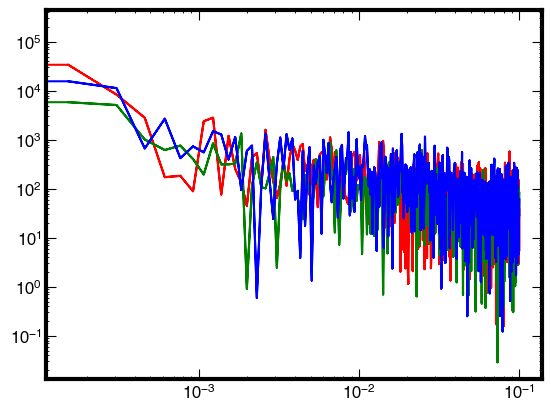

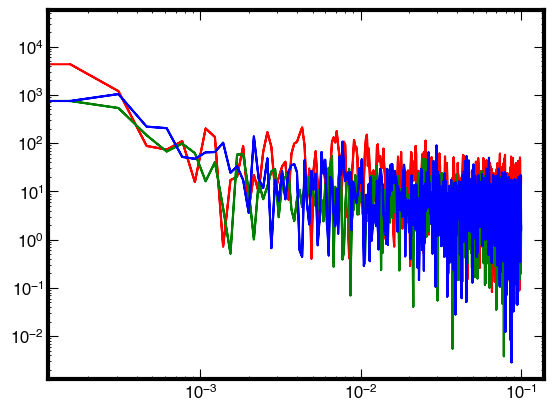

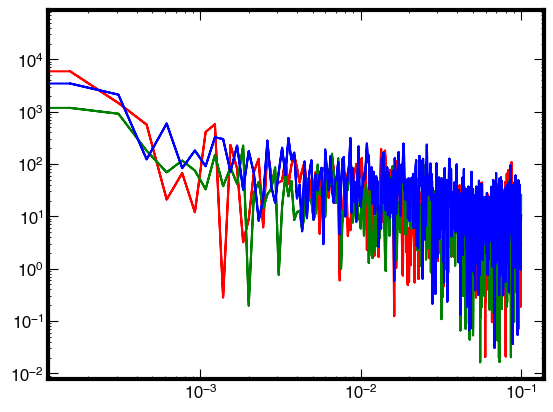

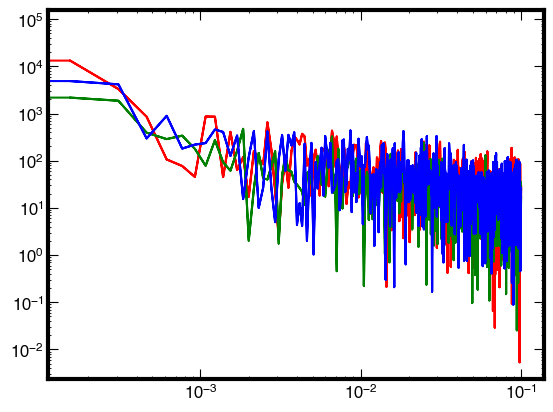

In [26]:
### Z plus
psd_Zp2 = windowed_psd(tZp)

### Z minus
psd_Zm2 = windowed_psd(tZm)

### Delta v
psd_dv2 = windowed_psd(tdv)

### Delta b
psd_db2 = windowed_psd(tdb)


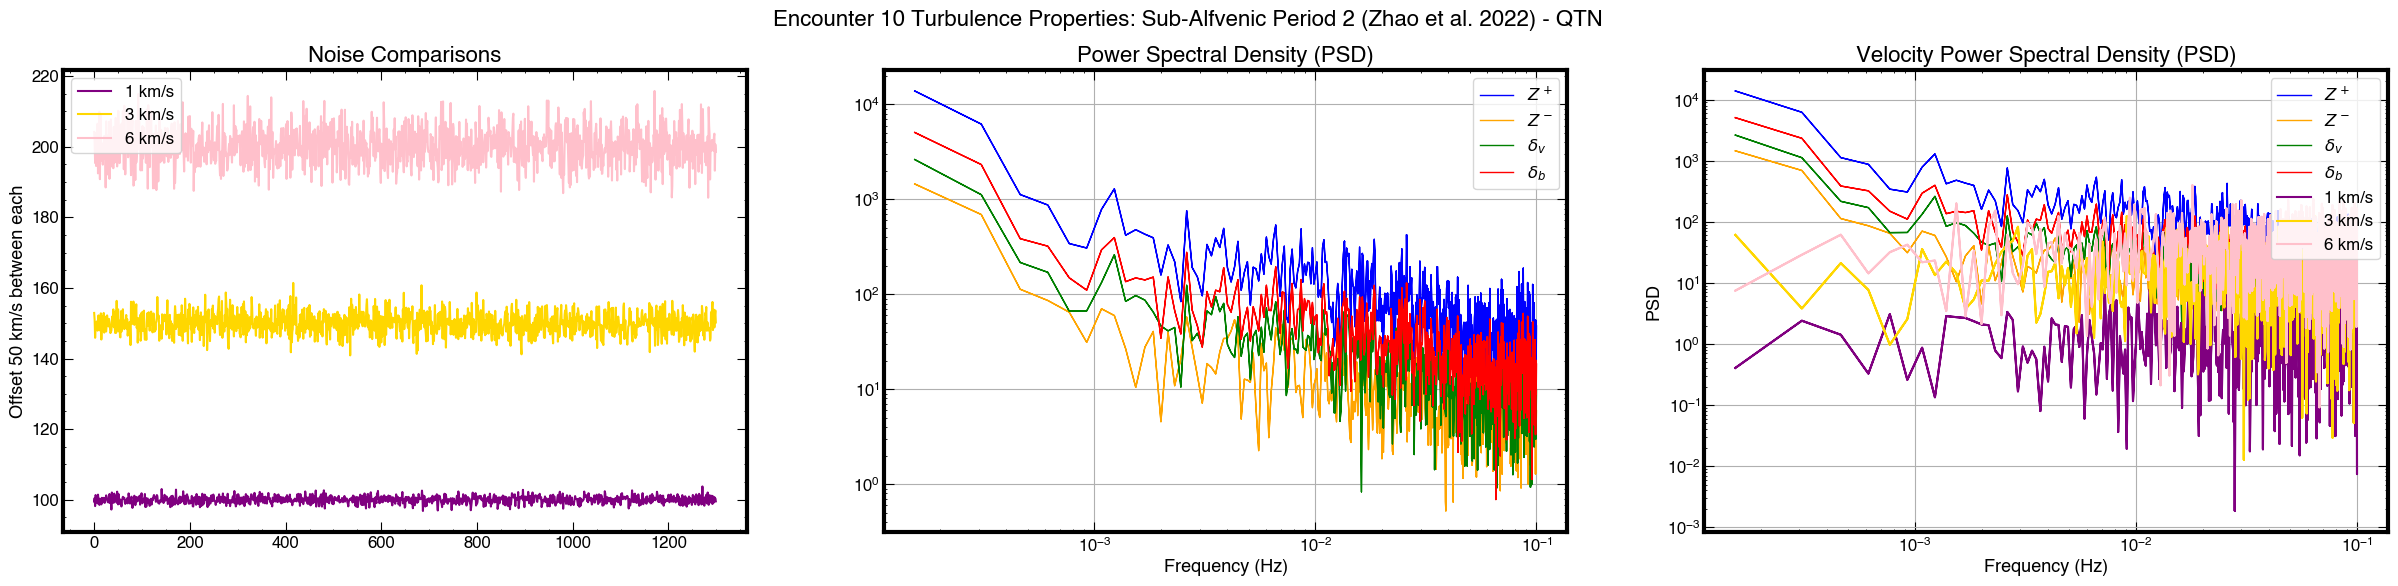

In [27]:
# Plot the PSD

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=[30, 6])
colors = ['blue', 'orange', 'green', 'red']
labels=[r'$Z^+$', r'$Z^-$', r'$\delta_v$', r'$\delta_b$']

##### NOISE COMPARISON #####
lab = ['1 km/s', '3 km/s', '6 km/s']
col = ['purple', 'gold', 'pink']
xy=[0, 50, 100]
for i, xx in enumerate(sn):
    ax1.plot(xx+xy[i], c=col[i], label=lab[i])

ax1.set_ylabel('Offset 50 km/s between each')
ax1.set_title('Noise Comparisons')
ax1.legend()

##### SPECTRA #####
freq = psd_Zp.freq
good = np.logical_and(np.array(freq)<=1, np.array(freq)>=1e-4)

for i, psd_spec in enumerate([psd_Zp2, psd_Zm2, psd_dv2, psd_db2]):
    ax2.plot(psd_spec.freq[good], psd_spec.power[good], c=colors[i], label=labels[i], linewidth=1)

ax2.legend(loc='upper right')
ax2.set_title('Power Spectral Density (PSD)')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_xscale('log')  
ax2.set_yscale('log')
ax2.grid(True)

##### NOISE + SPECTRA #####
for i, psd_spec in enumerate([psd_Zp2, psd_Zm2, psd_dv2, psd_db2]):
    ax3.plot(psd_spec.freq[good], psd_spec.power[good], c=colors[i], label=labels[i], linewidth=1)

ax3.plot(freq[good], refspec[0][good], label='1 km/s', color=col[0])
ax3.plot(freq[good], refspec[1][good], label='3 km/s', color=col[1])
ax3.plot(freq[good], refspec[2][good], label='6 km/s', color=col[2])
ax3.legend(loc='upper right')
ax3.set_title('Velocity Power Spectral Density (PSD)')
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('PSD')  
ax3.set_xscale('log')  
ax3.set_yscale('log')
ax3.grid(True)
# plt.savefig('PSD.png')

plt.suptitle('Encounter 10 Turbulence Properties: Sub-Alfvenic Period 2 (Zhao et al. 2022) - QTN')
plt.show()

## APPENDIX FIGURE

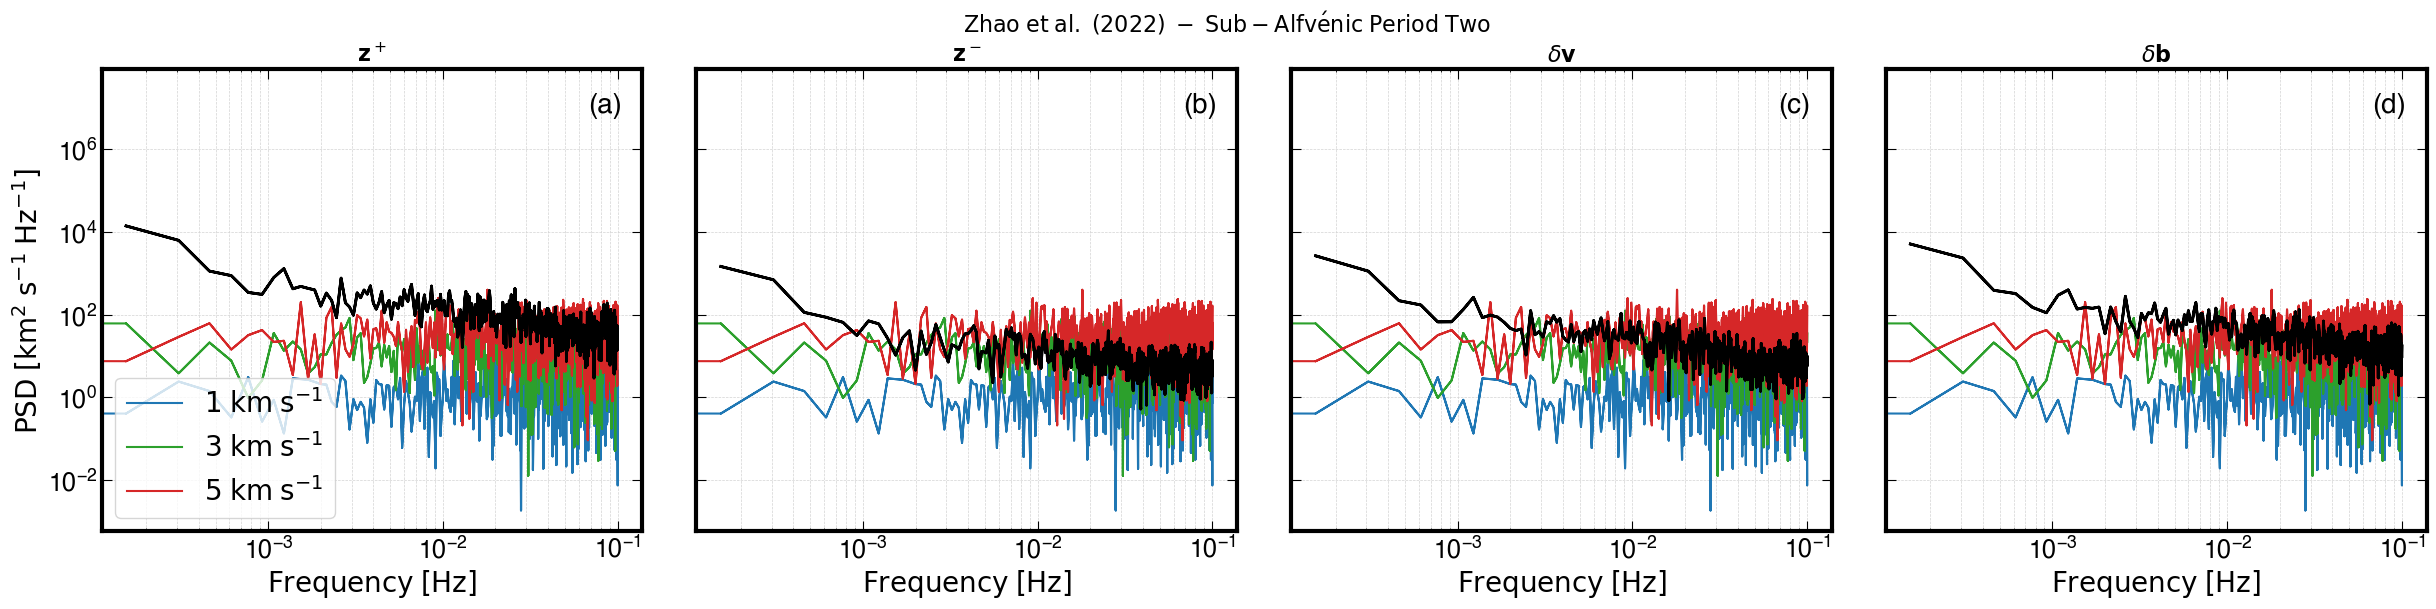

In [28]:
# Plot the PSD
lw=2
fig, axs = plt.subplots(1, 4, figsize=[30, 6], sharex='all', sharey='all', gridspec_kw={'wspace':0.1})
col = ['tab:blue', 'tab:green', 'tab:red']
panels = ['(a)', '(b)', '(c)', '(d)']
labels=[r'$\mathbf{z}^+$', r'$\mathbf{z}^-$', r'$\delta \mathbf{v}$', r'$\delta \mathbf{b}$']

##### ----- FAKE SPECTRA ---- #####
for i, ax in enumerate(axs):
    ax.plot(freq, refspec[0], label=r'$\rm 1 \; km \; s^{-1}$', color=col[0])
    ax.plot(freq, refspec[1], label=r'$\rm 3 \; km \; s^{-1}$', color=col[1])
    ax.plot(freq, refspec[2], label=r'$\rm 5 \; km \; s^{-1}$', color=col[2])
    ax.set_xlabel(r'$\rm Frequency \; [Hz]$', fontsize=20)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')
    ax.tick_params(axis='both', which='major', labelsize=18) 
    ax.text(0.90, 0.95, panels[i], transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
    ax.set_xscale('log')  
    ax.set_yscale('log')  
    ax.set_title(labels[i])

##### ------ REAL SPECTRA #####
for i, psd_spec in enumerate([psd_Zp2, psd_Zm2, psd_dv2, psd_db2]):
    axs[i].plot(psd_spec.freq[good], psd_spec.power[good], c='k', linewidth=lw, zorder=4)

### ADD PANEL LABELS
axs[0].set_ylabel(r'$\rm PSD \; [km^2 \; s^{-1} \; Hz^{-1}]$', fontsize=20)
axs[0].legend(loc='lower left', fontsize=20)

plt.suptitle(r'$\rm Zhao \; et \; al. \; (2022) \; - \; Sub-Alfv\'enic \; Period \; Two$')
plt.show()

# Figure 13: Combination Figure

19-Dec-23 16:56:53: /Users/tamarervin/anaconda3/envs/psp38/lib/python3.8/site-packages/fontTools/misc/py23.py:11: DeprecationWarning: The py23 module has been deprecated and will be removed in a future release. Please update your code.
  warnings.warn(

19-Dec-23 16:56:55: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


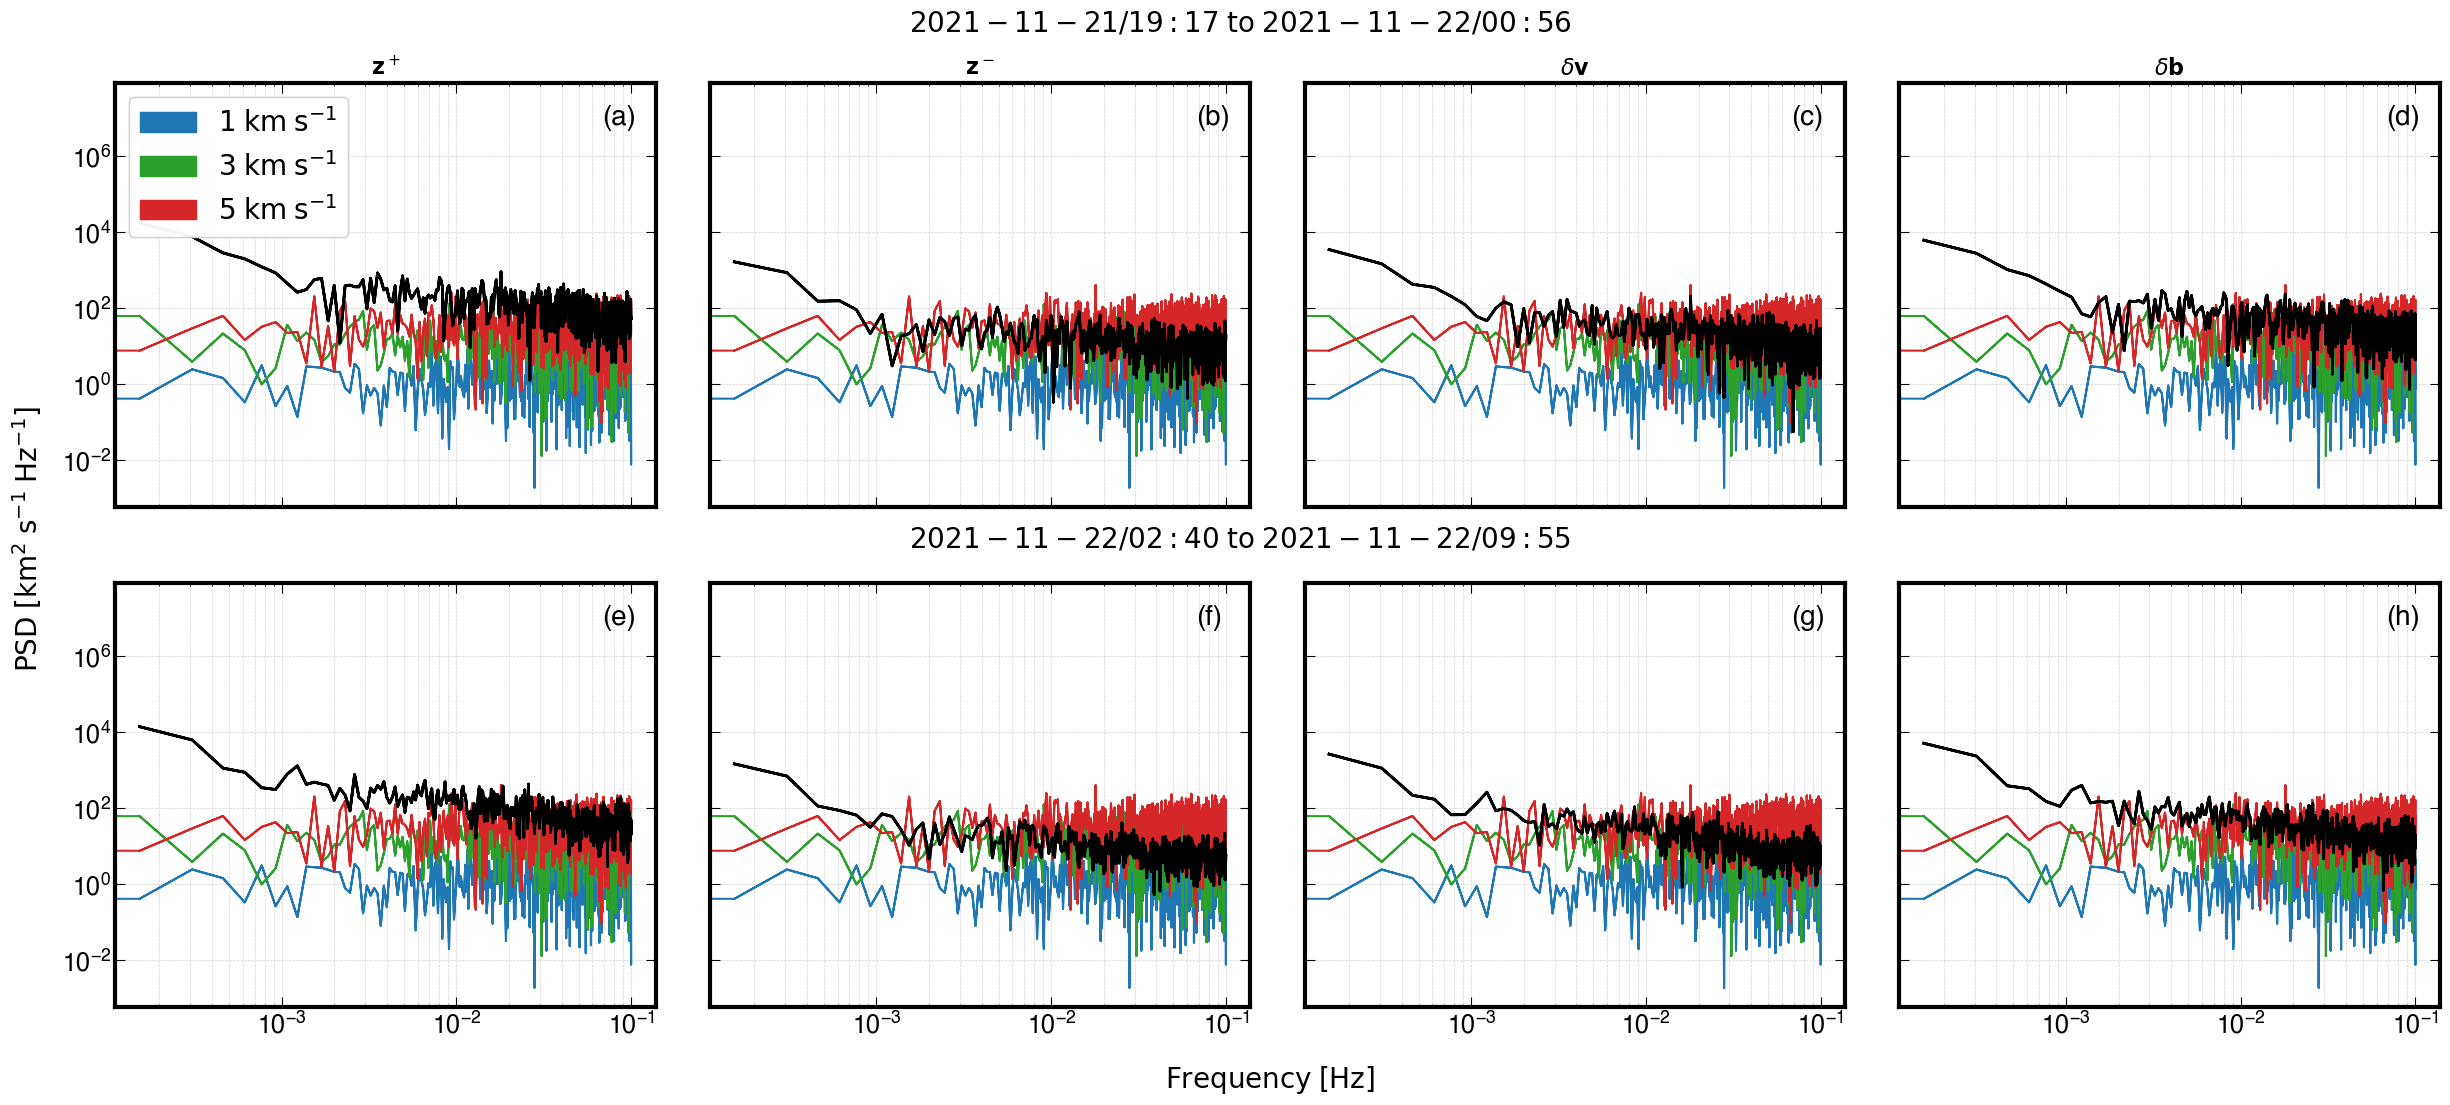

In [29]:
# Plot the PSD
lw=2
fig, axs = plt.subplots(2, 4, figsize=[30, 12], sharex='all', sharey='all', gridspec_kw={'wspace':0.1, 'hspace':0.18})
col = ['tab:blue', 'tab:green', 'tab:red']

labels=[r'$\mathbf{z}^+$', r'$\mathbf{z}^-$', r'$\delta \mathbf{v}$', r'$\delta \mathbf{b}$']

##### ----- FAKE SPECTRA - PERIOD ONE ---- #####
axx = axs[0]
panels = ['(a)', '(b)', '(c)', '(d)']
for i, ax in enumerate(axx):
    ax.plot(freq, refspec[0], label=r'$\rm 1 \; km \; s^{-1}$', color=col[0])
    ax.plot(freq, refspec[1], label=r'$\rm 3 \; km \; s^{-1}$', color=col[1])
    ax.plot(freq, refspec[2], label=r'$\rm 5 \; km \; s^{-1}$', color=col[2])
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')
    ax.tick_params(axis='both', which='major', labelsize=18) 
    ax.text(0.90, 0.95, panels[i], transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
    ax.set_xscale('log')  
    ax.set_yscale('log')  
# axx.set_title(r'$\rm Zhao \; et \; al. \; (2022) \; - \; Sub-Alfv\'enic \; Period \; One$')
        
##### ----- FAKE SPECTRA - PERIOD TWO ---- #####
axx = axs[1]
panels = ['(e)', '(f)', '(g)', '(h)']
for i, ax in enumerate(axx):
    ax.plot(freq, refspec[0], label=r'$\rm 1 \; km \; s^{-1}$', color=col[0])
    ax.plot(freq, refspec[1], label=r'$\rm 3 \; km \; s^{-1}$', color=col[1])
    ax.plot(freq, refspec[2], label=r'$\rm 5 \; km \; s^{-1}$', color=col[2])
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')
    ax.tick_params(axis='both', which='major', labelsize=18) 
    ax.text(0.90, 0.95, panels[i], transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
    ax.set_xscale('log')  
    ax.set_yscale('log')  
# axx.suptitle(r'$\rm Zhao \; et \; al. \; (2022) \; - \; Sub-Alfv\'enic \; Period \; Two$')


##### ------ REAL SPECTRA - PERIOD ONE #####
good = np.logical_and(np.array(psd_Zp.freq)<=1, np.array(psd_Zp.freq)>=1e-4)
for i, psd_spec in enumerate([psd_Zp, psd_Zm, psd_dv, psd_db]):
    axs[0][i].plot(psd_spec.freq[good], psd_spec.power[good], c='k', linewidth=lw, zorder=4)
    axs[0][i].set_title(labels[i])
##### ------ REAL SPECTRA - PERIOD TWO #####
good = np.logical_and(np.array(psd_Zp2.freq)<=1, np.array(psd_Zp2.freq)>=1e-4)
for i, psd_spec in enumerate([psd_Zp2, psd_Zm2, psd_dv2, psd_db2]):
    axs[1][i].plot(psd_spec.freq[good], psd_spec.power[good], c='k', linewidth=lw, zorder=4)

### ADD PANEL LABELS 
fig.text(0.09, 0.5, r'$\rm PSD \; [km^2 \; s^{-1} \; Hz^{-1}]$', fontsize=20, va='center', rotation='vertical')
fig.text(0.475, 0.05, r'$\rm Frequency \; [Hz]$', fontsize=20, va='center', rotation='horizontal')

### TITLES
fig.text(0.5, 0.93, r'$\rm 2021-11-21/19:17 \; to \; 2021-11-22/00:56$', fontsize=20, ha='center', va='center', rotation='horizontal') # period one
fig.text(0.5, 0.50, r'$\rm 2021-11-22/02:40 \; to \; 2021-11-22/09:55$', fontsize=20, ha='center', va='center', rotation='horizontal') # period two
# fig.text(0.5, 0.93, r'$\rm Zhao \; et \; al. \; (2022): \; Sub-Alfv\'enic \; Period \; One$', fontsize=20, ha='center', va='center', rotation='horizontal') # period one
# fig.text(0.5, 0.50, r'$\rm Zhao \; et \; al. \; (2022): \; Sub-Alfv\'enic \; Period \; Two$', fontsize=20, ha='center', va='center', rotation='horizontal') # period two

### LEGEND
ax = axs[0][0]
R_patch = mpatches.Patch(label=r'$\rm 1 \; km \; s^{-1}$', color=col[0])
T_patch = mpatches.Patch(label=r'$\rm 3 \; km \; s^{-1}$', color=col[1])
N_patch = mpatches.Patch(label=r'$\rm 5 \; km \; s^{-1}$', color=col[2])
leg0 = ax.legend(handles=[R_patch, T_patch, N_patch], loc='upper left', fontsize=20)
ax.add_artist(leg0)

plt.savefig(os.path.join(FIG_DIR, 'fig13.png'), bbox_inches='tight')
plt.savefig(os.path.join(EPS_DIR, 'fig13.eps'), bbox_inches='tight')


# Figure 12: Spectra Comparison

19-Dec-23 16:56:59: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


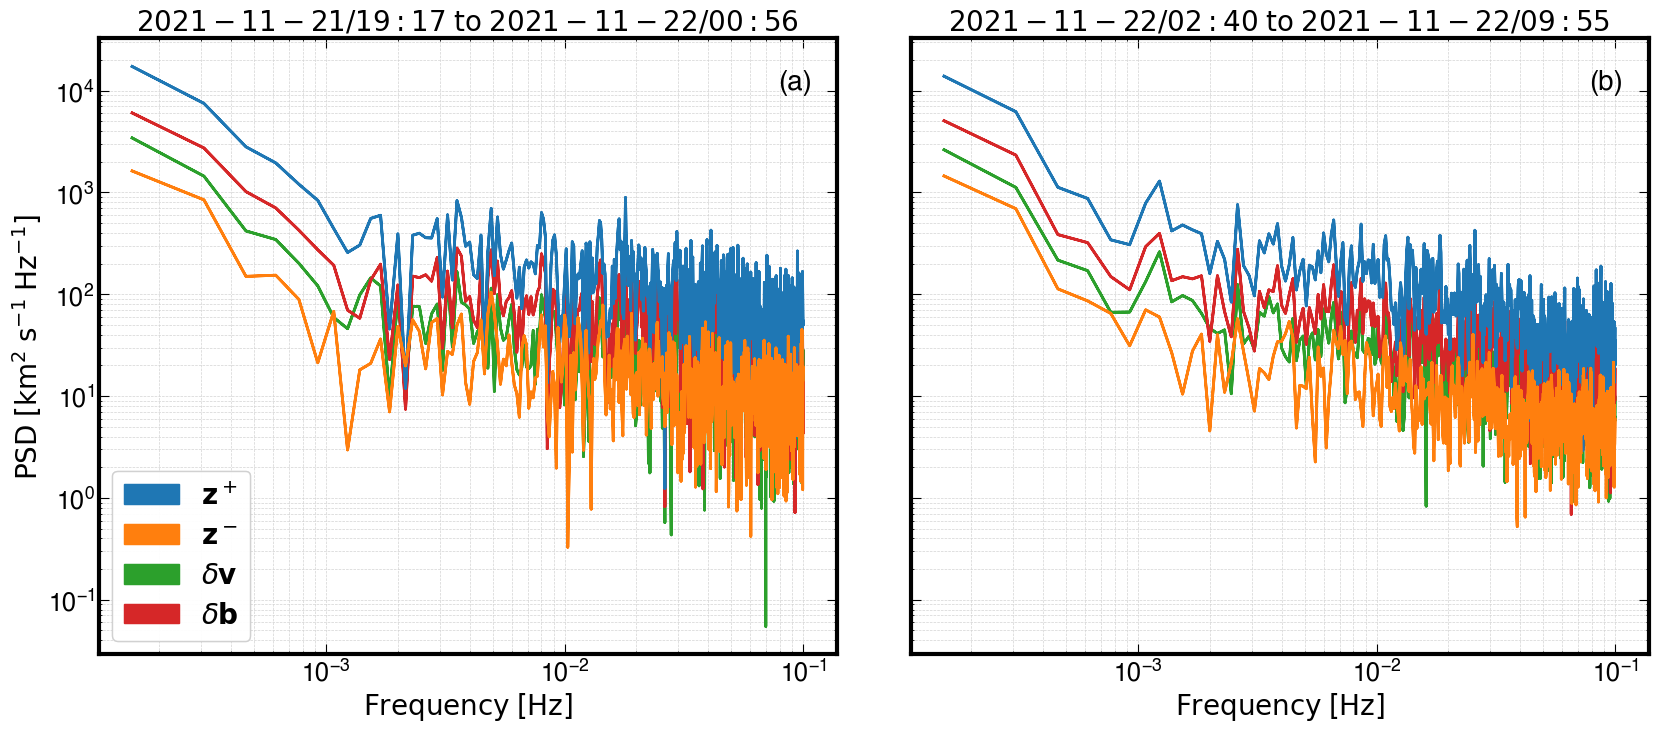

In [30]:
# Plot the PSD

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=[20, 8], sharex='all', sharey='all', gridspec_kw={'hspace': 0.05, 'wspace':0.1})
colors = ['tab:green', 'tab:red', 'tab:blue', 'tab:orange']
labels=[r'$\delta \mathbf{v}$', r'$\delta \mathbf{b}$', r'$\mathbf{z}^+$', r'$\mathbf{z}^-$']
lw=2
##### -------- PANEL ONE: PERIOD ONE -------- #####
ax = ax1
good = np.logical_and(np.array(psd_Zp.freq)<=1, np.array(psd_Zp.freq)>=1e-4)
for i, psd_spec in enumerate([psd_dv, psd_db, psd_Zp, psd_Zm]):
    ax.plot(psd_spec.freq[good], psd_spec.power[good], c=colors[i], label=labels[i], linewidth=lw)
# ax.loglog(psd_Zp.freq, (psd_Zp.power - psd_Zm.power)/4, c='k')

### LEGEND ###
zp_patch = mpatches.Patch(color=colors[0], label=labels[0])
zm_patch = mpatches.Patch(color=colors[1], label=labels[1])
dv_patch = mpatches.Patch(color=colors[2], label=labels[2])
db_patch = mpatches.Patch(color=colors[3], label=labels[3])
leg0 = ax.legend(handles=[dv_patch, db_patch, zp_patch, zm_patch], loc='lower left', fontsize=20)
ax.add_artist(leg0)

### ADD PANEL LABELS
ax.set_title(r'$\rm 2021-11-21/19:17 \; to \; 2021-11-22/00:56$', fontsize=20)
ax.text(0.92, 0.95, '(a)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.set_xlabel(r'$\rm Frequency \; [Hz]$', fontsize=20)
ax.set_ylabel(r'$\rm PSD \; [km^2 \; s^{-1} \; Hz^{-1}]$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18) 
ax.set_xscale('log')  
ax.set_yscale('log')
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')

##### -------- PANEL TWO: PERIOD TWO -------- #####
ax = ax2
good = np.logical_and(np.array(psd_Zp2.freq)<=1, np.array(psd_Zp2.freq)>=1e-4)
for i, psd_spec in enumerate([psd_dv2, psd_db2, psd_Zp2, psd_Zm2]):
    ax.plot(psd_spec.freq[good], psd_spec.power[good], c=colors[i], label=labels[i], linewidth=lw)
# ax.loglog(psd_Zp2.freq, (psd_Zp2.power - psd_Zm2.power)/4, c ='k')


### ADD PANEL LABELS
ax.set_title(r'$\rm 2021-11-22/02:40 \; to \; 2021-11-22/09:55$', fontsize=20)
ax.text(0.92, 0.95, '(b)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.set_xlabel(r'$\rm Frequency \; [Hz]$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18) 
ax.set_xscale('log')  
ax.set_yscale('log')
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')


### SAVE FIGURE
plt.savefig(os.path.realpath(os.path.join(FIG_DIR, 'fig12.png')), bbox_inches='tight')
plt.savefig(os.path.realpath(os.path.join(EPS_DIR, 'fig12.eps')), bbox_inches='tight')